In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Classic_DeepRL import DeepRLClassic
from cop_car_ctrm import CopCarCTRM
from cop_car import CopCarEnv
from firefightercar_ctrm import FireFighterCarCTRM
from firefighter_car import FireFighterCarEnv
from counterfactualDeepRL import DeepRLCounterFactual
from concurrent.futures import ThreadPoolExecutor
import multiprocessing
from concurrent.futures import ProcessPoolExecutor

In [2]:
#Firefighter environment- max rows and columns is 7
# Decay rate seems to have a lot of impact
rows = 5
columns = 5
probability = 0.97
environment = FireFighterCarEnv(rows= rows, cols= columns, probability= probability)
#Firefighter CTRM 
ctrm = FireFighterCarCTRM()
Gamma = 0.001
num_episodes = 50000
episode_length = 500
UPDATE_FREQUENCY = 30
threshold = 0.9
iterations = 1
max_episodes = 50000
decay_rate = 0.001
#Providing three times the capacity and batch size to check CRM
capacity = 50000
batch_size = 1500

In [3]:
# Perform value iteration to get the actual value of the objective
from value_iteration import ValueIteration
vi = ValueIteration(gamma = Gamma, environment = environment, ctrm = ctrm )
Value = vi.doVI()

In [4]:
print (Value)

0.5629471417724294


In [5]:
# Define the function to execute in parallel
def run_experiment_classic(i):
    print("Run:", i)
    RL_classic = DeepRLClassic(Gamma=Gamma, number_of_episodes=num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY, env= environment, ctrm= ctrm, decay_rate = decay_rate, capacity = capacity, batchsize = batch_size)
    classic_data = RL_classic.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
    RL_classic.print_strategy()
    return classic_data



with ThreadPoolExecutor() as executor:
    all_runs_data_classic = list(executor.map(run_experiment_classic, range(iterations)))




Run: 0
In state (4, 2, 0, 0, 1, 0, 0, 0), the action taken is 0
In state (4, 2, 0, 0, 1, 0, 0, 1), the action taken is 1
In state (4, 2, 0, 0, 1, 0, 0, 2), the action taken is 1
In state (3, 4, 0, 0, 0, 0, 1, 0), the action taken is 1
In state (3, 4, 0, 0, 0, 0, 1, 1), the action taken is 1
In state (3, 4, 0, 0, 0, 0, 1, 2), the action taken is 1
In state (1, 2, 0, 2, 3, 0, 1, 0), the action taken is 3
In state (1, 2, 0, 2, 3, 0, 1, 1), the action taken is 3
In state (1, 2, 0, 2, 3, 0, 1, 2), the action taken is 3
In state (3, 4, 0, 3, 4, 0, 0, 0), the action taken is 2
In state (3, 4, 0, 3, 4, 0, 0, 1), the action taken is 2
In state (3, 4, 0, 3, 4, 0, 0, 2), the action taken is 3
In state (3, 2, 0, 1, 2, 0, 1, 0), the action taken is 1
In state (3, 2, 0, 1, 2, 0, 1, 1), the action taken is 3
In state (3, 2, 0, 1, 2, 0, 1, 2), the action taken is 3
In state (4, 0, 0, 4, 0, 1, 1, 0), the action taken is 3
In state (4, 0, 0, 4, 0, 1, 1, 1), the action taken is 3
In state (4, 0, 0, 4, 0,

In [9]:
# all_runs_data_classic = [] 
# for i in range(2):
#     print("Run:", i )
#     RL_classic = DeepRLClassic(Gamma=Gamma, number_of_episodes=num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY, env= environment, ctrm= ctrm )
#     classic_data = RL_classic.doRL()
#     all_runs_data_classic.append(classic_data)
# average_results_classic = [0] * len(all_runs_data_classic[0])
# for i in range(len(all_runs_data_classic[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_classic)):
#         sum_val += all_runs_data_classic[j][i]
#     average_results_classic[i] = sum_val / len(all_runs_data_classic)
#     average_results_classic[i] /= Value
# print(average_results_classic)


# sum = []
# all_runs_data_classic = [] 
# for i in range(iterations):
#     print("Run:", i)
#     RL_classic = DeepRLClassic(Gamma=Gamma, number_of_episodes=num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY, env= environment, ctrm= ctrm, decay_rate = decay_rate)
#     classic_data = RL_classic.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
#     all_runs_data_classic.append(classic_data)

length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_classic[i]))
for sub_array in all_runs_data_classic:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)




average_results_classic = [0] * length
print(f"Completed, Number of iterations is {len(all_runs_data_classic[0])} and the number of episodes is {len(all_runs_data_classic)}")
for i in range (iterations):
    print(f"iteration {i}: {all_runs_data_classic[i]}")
for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
            sum_val += all_runs_data_classic[j][i]
    average_results_classic[i] = sum_val / iterations
    average_results_classic[i] /= Value 
# average_results_classic = np.array(average_results_classic)  
# average_results_classic = np.hstack([np.zeros((average_results_classic.shape[0], 1)), average_results_classic])
print(average_results_classic)

Completed, Number of iterations is 155 and the number of episodes is 1
iteration 0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04797624126682033, 0.091911250524566, 0.1315786482123915, 0.1481405858372209, 0.17324536435348745, 0.19172375815022935, 0.1789421742735474, 0.19099235400697637, 0.20392467543055848, 0.21754394652019438, 0.2332105820352312, 0.24646390451887573, 0.25935693367352775, 0.27178712345066147, 0.2837426827375863, 0.2941209504889564, 0.3042267119513955, 0.3113786606553165, 0.3197343188165241, 0.3269418671327635, 0.3342103460837977, 0.3394137864659746, 0.3456527323467647, 0.3516971393954591, 0.3568396751105373, 0.3624257136969901, 0.3670051490420545, 0.3722237318052558, 0.37671297051461855, 0.3808210794160883, 0.3845900927115693, 0.3884596735570762, 0.39161413328213934, 0.39529013292658194, 0.39837205071758813, 0.40108615234411255, 0.40403993723116766, 0.40673064724657376, 0.40906615810798724, 0.41189067164534116, 0.4148244400292425, 0.41720808067388954, 0.419180324627041

In [10]:
# all_runs_data_classic = np.array(all_runs_data_classic)
# all_runs_data_classic = np.hstack([np.zeros((all_runs_data_classic.shape[0], 1)), all_runs_data_classic])
# for row in all_runs_data_classic:
#     plt.plot(np.arange(len(row)) * UPDATE_FREQUENCY, row, color='blue')

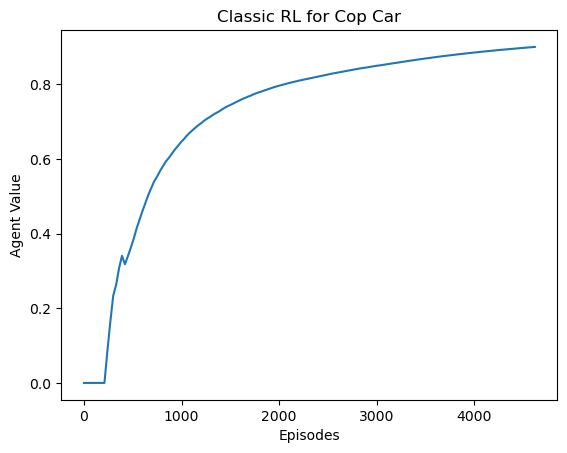

In [11]:
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Classic RL for Cop Car')
plt.show()

In [12]:
def run_experiment_counter(i):
    print("Run:", i)
    RL_counterfactual = DeepRLCounterFactual(Gamma=Gamma, number_of_episodes= num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY,  env= environment, ctrm= ctrm, decay_rate = decay_rate,capacity = capacity, batchsize = batch_size )
    counterfactual_data = RL_counterfactual.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
    RL_counterfactual.print_strategy()
    print(f"Run {i} completed")
    return counterfactual_data

with ThreadPoolExecutor() as executor:
    all_runs_data_counter = list(executor.map(run_experiment_counter, range(iterations)))

Run: 0
In state (4, 2, 0, 0, 1, 0, 0, 0), the action taken is 0
In state (4, 2, 0, 0, 1, 0, 0, 1), the action taken is 1
In state (4, 2, 0, 0, 1, 0, 0, 2), the action taken is 1
In state (3, 4, 0, 0, 0, 0, 1, 0), the action taken is 1
In state (3, 4, 0, 0, 0, 0, 1, 1), the action taken is 1
In state (3, 4, 0, 0, 0, 0, 1, 2), the action taken is 1
In state (1, 2, 0, 2, 3, 0, 1, 0), the action taken is 3
In state (1, 2, 0, 2, 3, 0, 1, 1), the action taken is 3
In state (1, 2, 0, 2, 3, 0, 1, 2), the action taken is 3
In state (3, 4, 0, 3, 4, 0, 0, 0), the action taken is 1
In state (3, 4, 0, 3, 4, 0, 0, 1), the action taken is 1
In state (3, 4, 0, 3, 4, 0, 0, 2), the action taken is 2
In state (3, 2, 0, 1, 2, 0, 1, 0), the action taken is 3
In state (3, 2, 0, 1, 2, 0, 1, 1), the action taken is 1
In state (3, 2, 0, 1, 2, 0, 1, 2), the action taken is 1
In state (4, 0, 0, 4, 0, 1, 1, 0), the action taken is 3
In state (4, 0, 0, 4, 0, 1, 1, 1), the action taken is 0
In state (4, 0, 0, 4, 0,

In [13]:
# all_runs_data_counter = [] 
# for i in range(2):
#     RL_counterfactual = DeepRLCounterFactual(Gamma=Gamma, number_of_episodes= num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY,  env= environment, ctrm= ctrm )
#     counterfactual_data = RL_counterfactual.doRL()
#     all_runs_data_counter.append(counterfactual_data)
# average_results_counter = [0] * len(all_runs_data_counter[0])
# for i in range(len(all_runs_data_counter[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_counter)):
#         sum_val += all_runs_data_counter[j][i]
#     average_results_counter[i] = sum_val / len(all_runs_data_counter)
#     average_results_counter[i] /= Value
# print(average_results_counter)


# sum = []
# all_runs_data_counter = [] 
# for i in range(iterations):
#     print("Run:", i)
#     RL_counterfactual = DeepRLCounterFactual(Gamma=Gamma, number_of_episodes= num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY,  env= environment, ctrm= ctrm, decay_rate = decay_rate )
#     counterfactual_data = RL_counterfactual.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
#     all_runs_data_counter.append(counterfactual_data)

length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_counter[i]))
average_results_counter = [0] * length

for sub_array in all_runs_data_counter:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)

for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
        if i < len(all_runs_data_counter[j]):
            num_iter += 1
            sum_val += all_runs_data_counter[j][i]
    average_results_counter[i] = sum_val / num_iter
    average_results_counter[i] /= Value
# average_results_classic = np.hstack([np.zeros((average_results_classic.shape[0], 1)), average_results_classic])
print(average_results_counter)

[0.0, 0.3141956947836724, 0.20946379652244823, 0.37351529482301893, 0.2988122358584151, 0.378248624852367, 0.32421310701631456, 0.38945829698279677, 0.4495545011116041, 0.4045990510004437, 0.44900141534111115, 0.4115846307293518, 0.4331770900290468, 0.46933680237079184, 0.4888744836850617, 0.5117520951353922, 0.531798724522636, 0.5436906714078937, 0.5557856052601106, 0.5735408159843857, 0.5912125175219175, 0.6025461405769938, 0.6095701402332078, 0.6234879478858216, 0.6378326887452751, 0.6482959807941249, 0.6562579255093471, 0.6632174663897197, 0.6706244752832737, 0.6795406337104587, 0.6849235070715487, 0.6923750475759166, 0.6988437840643261, 0.7033226454200747, 0.7096978797826111, 0.7141980027743613, 0.7205329428889653, 0.7243270356700194, 0.7299829831282136, 0.7355538117690369, 0.7408206381063401, 0.7231820514847607, 0.7284241151017361, 0.7338817577015845, 0.7380357505939227, 0.7424021758334413, 0.7461220754624343, 0.7499596183515932, 0.7546806136552102, 0.7585272237646111, 0.76196686

In [14]:
# all_runs_data_counter = np.array(all_runs_data_counter)
# all_runs_data_counter = np.hstack([np.zeros((all_runs_data_counter.shape[0], 1)), all_runs_data_counter])
# for row in all_runs_data_counter:
#     plt.plot(np.arange(len(row)) * UPDATE_FREQUENCY, row, color='blue')

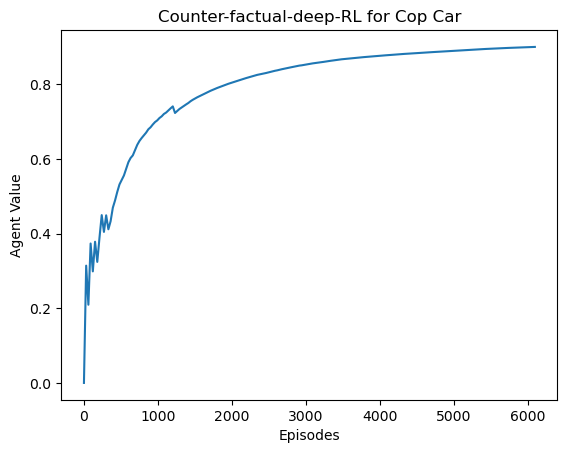

In [15]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Counter-factual-deep-RL for Cop Car')
plt.show()

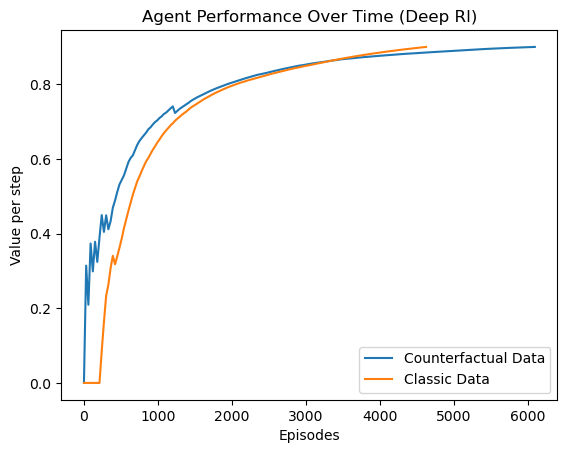

In [16]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter, label='Counterfactual Data')

# Plot classic data
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic, label='Classic Data')

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Value per step')
plt.title('Agent Performance Over Time (Deep Rl)')

# Adding a legend to clarify which line corresponds to which dataset
plt.legend()

# Show the plot
plt.show()

In [17]:
from TabularLearning import DynamicQLearning
from TabularLearningCounterFactual import DynamicQLearningCounterFactual
Gamma = 0.001
num_episodes = 100000
episode_length = 50000
alpha = 0.01
UPDATE_FREQUENCY = 75


In [18]:
# trying to run tabular learning in parallel 

from concurrent.futures import ThreadPoolExecutor

# Define the function to execute in parallel
def run_experiment_classic(i):
    print("Run:", i)
    tabularlearning = DynamicQLearning(alpha=alpha, gamma=Gamma, UPDATE_FREQUENCY=UPDATE_FREQUENCY, environment=environment, ctrm=ctrm, decay_rate=decay_rate)
    tabular_data = tabularlearning.trainwithconvergence(num_episodes=num_episodes, max_episode_length=episode_length, value=Value, threshold=threshold, max_episodes=max_episodes)
    return tabular_data

with ThreadPoolExecutor() as executor:
    all_runs_data_classic = list(executor.map(run_experiment_classic, range(iterations)))

Run: 0
Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Episode: 10000
Episode: 11000
Episode: 12000
Episode: 13000
Episode: 14000
Episode: 15000
Episode: 16000
Episode: 17000
Episode: 18000
Episode: 19000
Episode: 20000
Episode: 21000
Episode: 22000
Episode: 23000
Episode: 24000
Episode: 25000
Episode: 26000
Episode: 27000
Episode: 28000
Episode: 29000
Episode: 30000
Episode: 31000
Episode: 32000
Episode: 33000
Episode: 34000
Episode: 35000
Episode: 36000
Episode: 37000
Episode: 38000
Episode: 39000
Episode: 40000
Episode: 41000
Episode: 42000
Episode: 43000
Episode: 44000
Episode: 45000
Episode: 46000
Episode: 47000
Episode: 48000
Episode: 49000
Episode: 50000


In [19]:
# all_runs_data_classic = [] 
# for i in range(10):
#     tabularlearning = DynamicQLearning(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm)
#     tabular_data = tabularlearning.train( num_episodes = num_episodes, max_episode_length = episode_length )    
#     all_runs_data_classic.append(tabular_data)
# average_results_classic = [0] * len(all_runs_data_classic[0])
# for i in range(len(all_runs_data_classic[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_classic)):
#         sum_val += all_runs_data_classic[j][i]
#     average_results_classic[i] = sum_val / len(all_runs_data_classic)
#     average_results_classic[i] /= Value
# print(average_results_classic)



# sum = []
# all_runs_data_classic = [] 
# for i in range(iterations):
#     print("Run:", i)
#     tabularlearning = DynamicQLearning(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm, decay_rate = decay_rate)
#     tabular_data = tabularlearning.trainwithconvergence( num_episodes = num_episodes, max_episode_length = episode_length, value = Value, threshold = threshold, max_episodes = max_episodes )    
#     all_runs_data_classic.append(tabular_data)


length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_classic[i]))
average_results_classic = [0] * length
for sub_array in all_runs_data_classic:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)

for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
        if i < len(all_runs_data_classic[j]):
            sum_val += all_runs_data_classic[j][i]
    average_results_classic[i] = sum_val / iterations
    average_results_classic[i] /= Value
print(average_results_classic)




[0.5884680101525412, 0.6635213581998395, 0.6839324998265051, 0.7274516362056925, 0.7559631044851699, 0.7749707500048215, 0.7885476396617155, 0.7995185747723225, 0.8080515243027947, 0.8148778839271725, 0.8204630872562089, 0.8251174233637393, 0.8290557077624187, 0.832431380104144, 0.8353569628003059, 0.8379168476594475, 0.8401755695939843, 0.8421833224246835, 0.8439797328521513, 0.8455965022368723, 0.8470592935849531, 0.8483891039013903, 0.8496032785381373, 0.8507162719551554, 0.8517402258988119, 0.8526854141544951, 0.8535605884653127, 0.8543732503253576, 0.8551298665398822, 0.8558360416734385, 0.8564966571209589, 0.8571159841030093, 0.8576977761164506, 0.8582453450702777, 0.8587616243696005, 0.8592492214856275, 0.8597104620007883, 0.8601474266993616, 0.8605619829518542, 0.8609558113917222, 0.861330428688182, 0.8616872070657627, 0.8620273911002003, 0.8623521122239814, 0.8626624012978168, 0.862959199542355, 0.8632433680743598, 0.8635156962508642, 0.863776908991593, 0.8640276732226926, 0.8

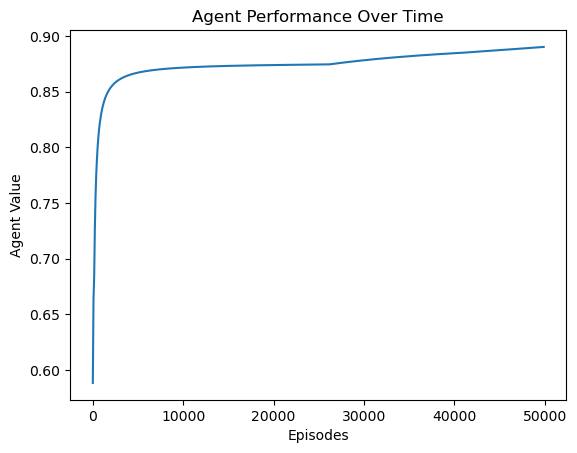

In [20]:
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Agent Performance Over Time')
plt.show()

In [21]:
# Define the function to execute in parallel
def run_experiment_counter(i):
    print("Run:", i)
    tabularlearningcounter = DynamicQLearningCounterFactual(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm, decay_rate = decay_rate)
    tabular_data_counter = tabularlearningcounter.trainwithconvergence( num_episodes = num_episodes, max_episode_length = episode_length, value = Value, threshold = threshold, max_episodes = max_episodes )
    print(f"Run {i} completed")
    return tabular_data_counter

with ThreadPoolExecutor() as executor:
    all_runs_data_counter = list(executor.map(run_experiment_counter, range(iterations)))

Run: 0
Run 0 completed


In [22]:
# sum = []
# all_runs_data_counter = [] 
# for i in range(10):
#     tabularlearningcounter = DynamicQLearningCounterFactual(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm)
#     tabular_data_counter = tabularlearningcounter.train( num_episodes = num_episodes, max_episode_length = episode_length )
#     all_runs_data_counter.append(tabular_data_counter)
# average_results_counter = [0] * len(all_runs_data_counter[0])
# for i in range(len(all_runs_data_counter[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_counter)):
#         sum_val += all_runs_data_counter[j][i]
#     average_results_counter[i] = sum_val / len(all_runs_data_counter)
#     average_results_counter[i] /= Value
# print(average_results_counter)



sum = []
all_runs_data_counter = [] 
for i in range(iterations):
    print("Run:", i)
    tabularlearningcounter = DynamicQLearningCounterFactual(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm, decay_rate = decay_rate)
    tabular_data_counter = tabularlearningcounter.trainwithconvergence( num_episodes = num_episodes, max_episode_length = episode_length, value = Value, threshold = threshold, max_episodes = max_episodes )
    all_runs_data_counter.append(tabular_data_counter)

length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_counter[i]))
average_results_counter = [0] * length

for sub_array in all_runs_data_counter:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)


for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
        if i<len(all_runs_data_counter[j]):
            sum_val += all_runs_data_counter[j][i]
    average_results_counter[i] = sum_val / iterations
    average_results_counter[i] /= Value
print(average_results_counter)

Run: 0
[0.6553095035794725, 0.7367579576306635, 0.7747227564940158, 0.7962605292485336, 0.8091831929012442, 0.8316729758154408, 0.8477371064684383, 0.8597852044581863, 0.8691559473391014, 0.8766525416438335, 0.8827861188022507, 0.8878974331009316, 0.8922223913536618, 0.8959294984274302, 0.8991423245580299, 0.9019535474223044]


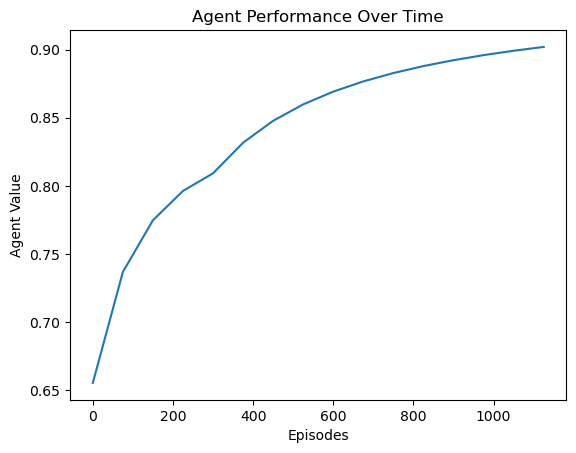

In [23]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Agent Performance Over Time')
plt.show()

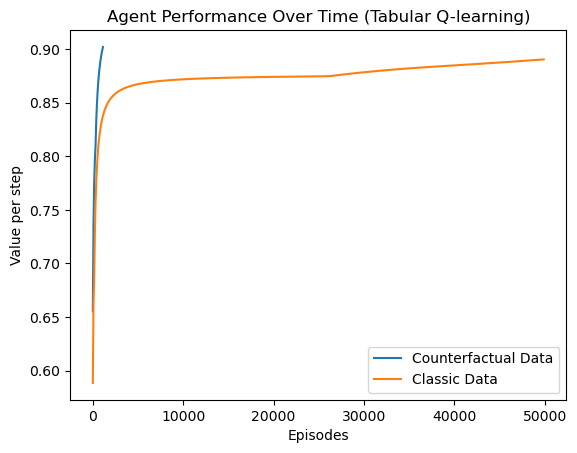

In [24]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter, label='Counterfactual Data')

# Plot classic data
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic, label='Classic Data')

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Value per step')
plt.title('Agent Performance Over Time (Tabular Q-learning)')

# Adding a legend to clarify which line corresponds to which dataset
plt.legend()

# Show the plot
plt.show()

In [25]:
        function1 = {
    (0, 0): 0.03 , (0, 1): 0.03, (0, 2): 0.03, (0, 3): 0.2, (0, 4): 0.06, (0, 5): 0.06, (0, 6): 0.06,
    (1, 0): 0.03, (1, 1): 0.2, (1, 2): 0.2, (1, 3): 0.03, (1, 4): 0.03, (1, 5): 0.03, (1, 6): 0.03,
    (2, 0): 0.03, (2, 1): 0.06, (2, 2): 0.2, (2, 3): 0.03, (2, 4): 0.03, (2, 5): 0.06, (2, 6): 0.03,
    (3, 0): 0.03, (3, 1): 0.2, (3, 2): 0.06, (3, 3): 0.06, (3, 4): 0.2, (3, 5): 0.06, (3, 6): 0.03,
    (4, 0): 0.03, (4, 1): 0.06, (4, 2): 0.2, (4, 3): 0.06, (4, 4): 0.06, (4, 5): 0.2, (4, 6): 0.2,
    (5, 0): 0.2, (5, 1): 0.06, (5, 2): 0.2, (5, 3): 0.03, (5, 4): 0.03, (5, 5): 0.03, (5, 6): 0.03,
    (6, 0): 0.06, (6, 1): 0.03, (6, 2): 0.2, (6, 3): 0.06, (6, 4): 0.06, (6, 5): 0.2, (6, 6): 0.03
}
function1 = {position: round(value * 10, 2) for position, value in function1.items()}
print(function1)

{(0, 0): 0.3, (0, 1): 0.3, (0, 2): 0.3, (0, 3): 2.0, (0, 4): 0.6, (0, 5): 0.6, (0, 6): 0.6, (1, 0): 0.3, (1, 1): 2.0, (1, 2): 2.0, (1, 3): 0.3, (1, 4): 0.3, (1, 5): 0.3, (1, 6): 0.3, (2, 0): 0.3, (2, 1): 0.6, (2, 2): 2.0, (2, 3): 0.3, (2, 4): 0.3, (2, 5): 0.6, (2, 6): 0.3, (3, 0): 0.3, (3, 1): 2.0, (3, 2): 0.6, (3, 3): 0.6, (3, 4): 2.0, (3, 5): 0.6, (3, 6): 0.3, (4, 0): 0.3, (4, 1): 0.6, (4, 2): 2.0, (4, 3): 0.6, (4, 4): 0.6, (4, 5): 2.0, (4, 6): 2.0, (5, 0): 2.0, (5, 1): 0.6, (5, 2): 2.0, (5, 3): 0.3, (5, 4): 0.3, (5, 5): 0.3, (5, 6): 0.3, (6, 0): 0.6, (6, 1): 0.3, (6, 2): 2.0, (6, 3): 0.6, (6, 4): 0.6, (6, 5): 2.0, (6, 6): 0.3}
